## **CAR PREDICTION DATA - Introduction To Data Science Project**


---



---





## Importing Libraries and reading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Collecting data in csv format.

In [ ]:
data = pd.read_csv("car.csv")

Functions for converting categorical data into numerical data .



In [ ]:
data = pd.read_csv("car.csv")
buying_mapping = {
    'vhigh':4,
    'high':3,
    'med':2,
    'low':1
}

maintenance_mapping = {
    'vhigh':4,
    'high':3,
    'med':2,
    'low':1
}


Doors_mapping = {
    '2':2,
    '3':3,
    '4':4,
    '5more':6
}

Persons_mapping = {
    '2' : 2,
    '4' : 4 ,
    'more' : 6
}

Lug_Boot_mapping = {
    'small' : 1,
    'med' : 2,
    'big' : 3
}

Safety_mapping = {
    'low' : 1,
    'med' :2,
    'high' :3
}

Class_mapping = {
    'unacc' :1,
    'acc' : 2,
    'vgood': 3,
    'good' : 4
}


Data preprocessing and study-
We study the attributes,checking what type of data is their in attribtes?. 
Analysis of individual attributes and their corerelation with other attributes.
Also we checked whether there is null value in our data or not?
Check whether there is a class imbalance problem in our data or not.




Printing the entries of top 5 rows.

In [ ]:
data.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


*italicized text*
Here we are checking whether there are null values or not in our data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying         1728 non-null object
Maintenance    1728 non-null object
Doors          1728 non-null object
Persons        1728 non-null object
Lug-Boot       1728 non-null object
Safety         1728 non-null object
Class          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


Here in above
Total number of samples taken: 1728.It is seen that all the attributes are categorical. Also, all tuples didn't have any null data. Hence, cleaning for null values is not required.

### New Section

printing the distribution of different attributes values in our data set for each attribute.

In [ ]:
for i in data.columns:
    print(data[i].value_counts())
    print()

low      432
vhigh    432
high     432
med      432
Name: Buying, dtype: int64

low      432
vhigh    432
high     432
med      432
Name: Maintenance, dtype: int64

3        432
2        432
5more    432
4        432
Name: Doors, dtype: int64

more    576
2       576
4       576
Name: Persons, dtype: int64

small    576
med      576
big      576
Name: Lug-Boot, dtype: int64

low     576
high    576
med     576
Name: Safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64



Checking whether there is class imbalance problem in our data or not. 

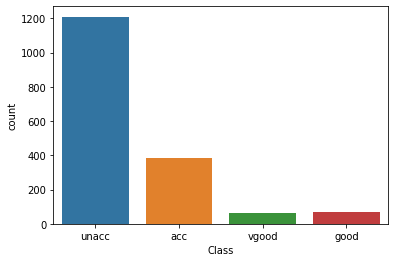

In [ ]:
sns.countplot(data['Class'],label="Count")

Above we saw that 'unacc' class label has most entries(1200+ from 1728 entries) in our data which is creating a class imbalance problem.Here we get to know that,accuracy will be not a helpful parameter for calulating classifier performance.So we will use f1 score as performance parameter for comparing classifiers performance.

In [ ]:
data['Buying'] = data['Buying'].map(buying_mapping)
data['Maintenance'] = data['Maintenance'].map(maintenance_mapping)
data['Doors'] = data['Doors'].map(Doors_mapping)
data['Persons'] = data['Persons'].map(Persons_mapping)
data['Lug-Boot'] = data['Lug-Boot'].map(Lug_Boot_mapping)
data['Safety'] = data['Safety'].map(Safety_mapping)
data['Class'] = data['Class'].map(Class_mapping)

Above we convert categorical data into numerical data.
The changed values after converting is:
Attribute name-Buying
    'vhigh': 4,
    'high': 3,
    'med': 2,
    'low':1

Attribute name-Maintenance
    { 'vhigh':4,
    'high':3,
    'med':2,
    'low':1 }


Attribute name-Doors
    { '2':2,
    '3':3,
    '4':4
    '5more':6 }

Attribute name-Persons
    { '2' : 2,
    '4' : 4,
    'more' : 6 }
    

Attribute name-Lug_Boot
    { 'small' : 1,
    'med' : 2,
    'big' : 3 }
}

Attribute name-Safety
    { 'low' : 1,
    'med' :2,
    'high' :3 }

 
Attribute name-Class
    { 'unacc' :1,
    'acc' : 2,
    'vgood': 3,
    'good' : 4 }



In [ ]:
data.describe()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.750000,4.000000,2.000000,2.000000,1.417245
std,1.118358,1.118358,1.479448,1.633466,0.816733,0.816733,0.747188
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,4.500000,6.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,6.000000,6.000000,3.000000,3.000000,4.000000


Above we calculate the mean and other statistical measures.
Here The mean for different attributes don't have huge differences and also standard deviation is almost same and min,max for different attributes are almost same.So therefore we don't have any requirement of doing feature scaling.

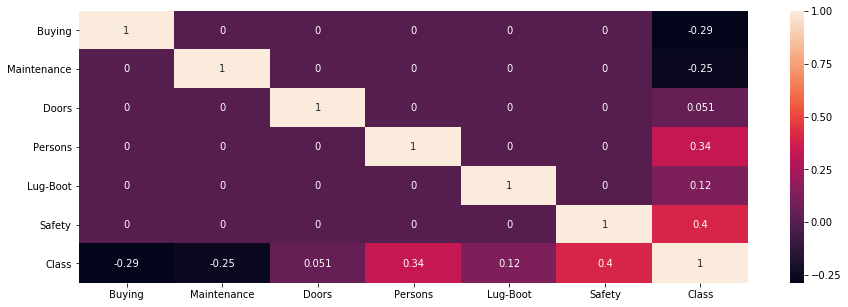

In [ ]:
fig=plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

data splitting

we are splitting our data in test size as 0.2 and training size as 0.8

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
y=data.Class
X=data.drop('Class',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Here we are applying gaussian naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

calculating performance parameters for gaussian naive bayes classifier.

Confusion matrix
 [[214   9  17   0]
 [ 28  13  33   5]
 [  0   0  10   0]
 [  3   3   8   3]] 

Confusion matrix plot


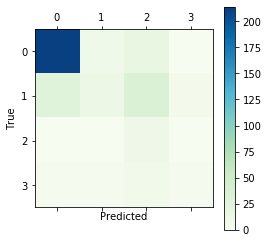

Classfication report
              precision    recall  f1-score   support

           1       0.87      0.89      0.88       240
           2       0.52      0.16      0.25        79
           3       0.15      1.00      0.26        10
           4       0.38      0.18      0.24        17

    accuracy                           0.69       346
   macro avg       0.48      0.56      0.41       346
weighted avg       0.75      0.69      0.69       346



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 

Here in knn we don't take accuracy as parameter of evaluating the classifer due to class imabalance problem so we take f1 score as parameter of evaluating.

**F1 score for Naive Bayes is 0.69.**



now using 
knn classifier
we first calculate minimum error for finding k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


plotting errors vs k graph and finding k for minimum error.

Text(0, 0.5, 'Mean Error')

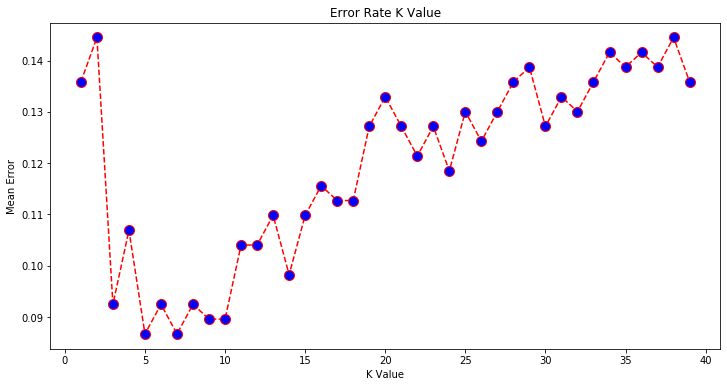

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
minpos = error.index(min(error))
minpos=minpos+1
print ("best value of k for which errror is minimum will be",minpos)

best value of k for which errror is minimum will be 5


we find minimum error at k=5 so
we did classification for k=5.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=minpos)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

Confusion matrix
 [[229  11   0   0]
 [  6  70   0   3]
 [  0   3   6   1]
 [  0   5   1  11]] 

Confusion matrix plot


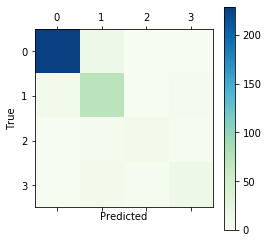

Classfication report
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       240
           2       0.79      0.89      0.83        79
           3       0.86      0.60      0.71        10
           4       0.73      0.65      0.69        17

    accuracy                           0.91       346
   macro avg       0.84      0.77      0.80       346
weighted avg       0.92      0.91      0.91       346



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test,pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test,pred)) 

here the f1 score for knn algo is 0.91

# Now decision tree classifier

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

Confusion matrix
 [[239   1   0   0]
 [  7  70   0   2]
 [  0   1   9   0]
 [  0   0   0  17]] 

Confusion matrix plot


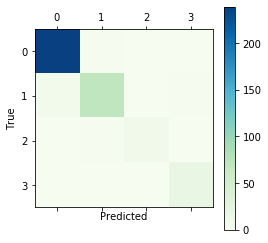

Classfication report
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       240
           2       0.97      0.89      0.93        79
           3       1.00      0.90      0.95        10
           4       0.89      1.00      0.94        17

    accuracy                           0.97       346
   macro avg       0.96      0.95      0.95       346
weighted avg       0.97      0.97      0.97       346



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test,pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test,pred)) 

now f1 score for decision tree classifier is 0.97

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

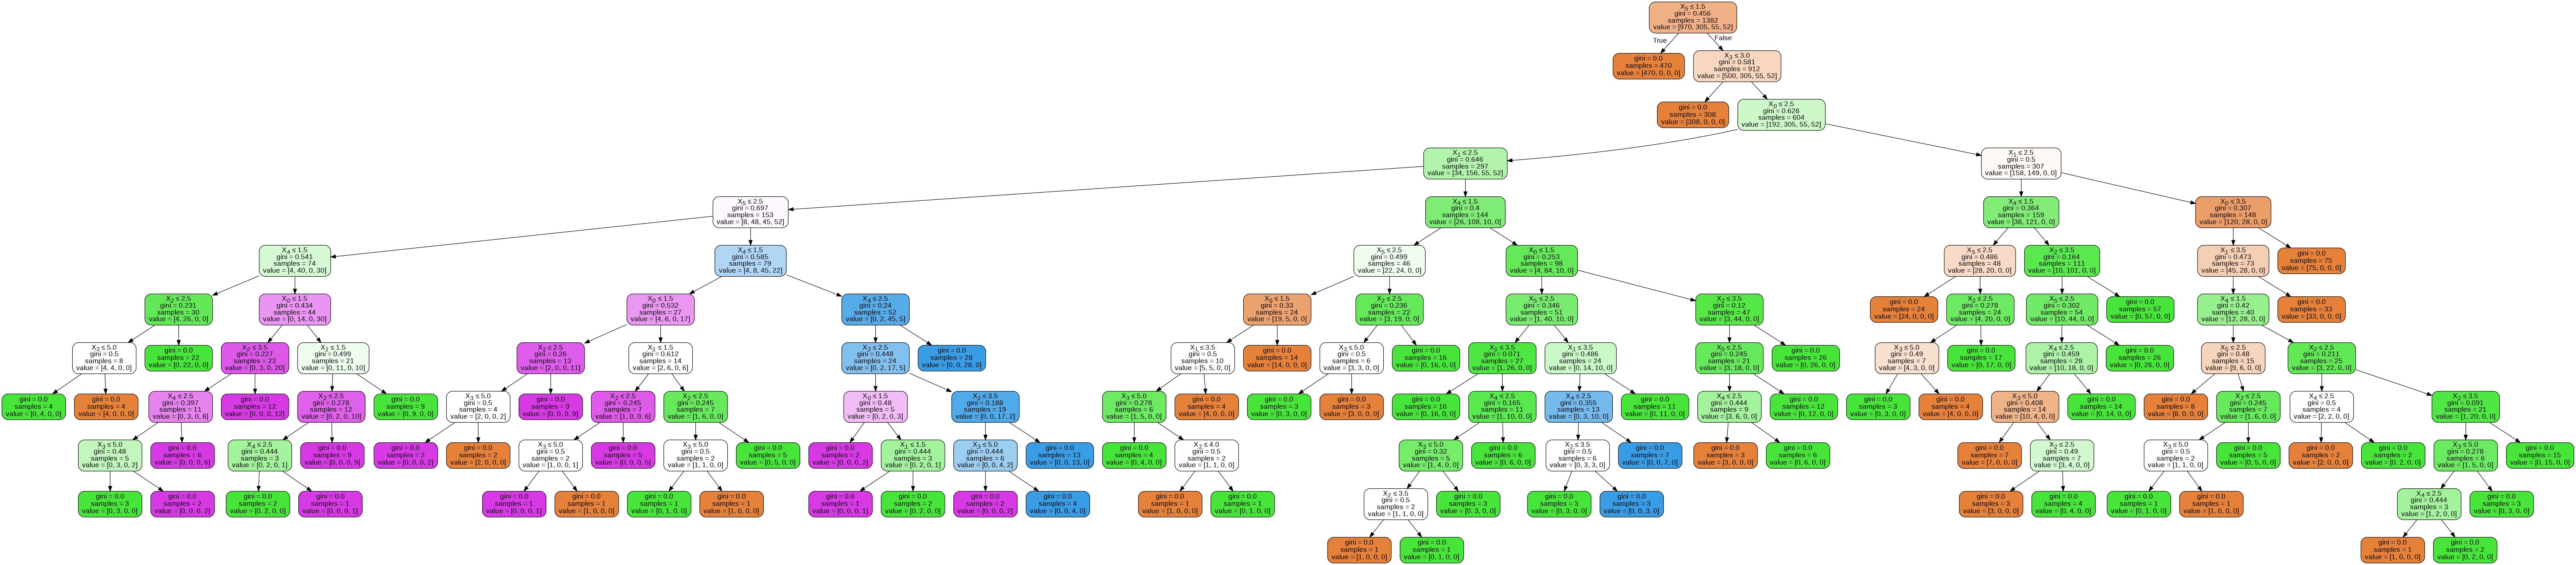

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())